# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
import re

# Import Dataset

In [4]:
datasetFolderPath = r'/Users/boonsuenoh/Documents/Dev/product-recommender-system/datasets/'

In [5]:
products = pd.read_json(datasetFolderPath + 'subset_meta_Electronics.json', lines=True)

In [4]:
products.head(50)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Electronics, Camera &amp; Photo, Video Survei...",,[The following camera brands and models have b...,,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],,GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...","[>#3,092 in Tools &amp; Home Improvement &gt; ...",[],Camera &amp; Photo,,"January 28, 2014",$65.00,0011300000,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Electronics, Camera &amp; Photo]",,[This second edition of the Handbook of Astron...,,"Books ""Handbook of Astronomical Image Processi...",[0999470906],,33 Books Co.,[Detailed chapters cover these fundamental top...,"[>#55,933 in Camera &amp; Photo (See Top 100 i...","[0943396670, 1138055360, 0999470906]",Camera &amp; Photo,,"June 17, 2003",,0043396828,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Electronics, eBook Readers &amp; Accessories,...",,[A zesty tale. (Publishers Weekly)<br /><br />...,,One Hot Summer,"[0425167798, 039914157X]",,Visit Amazon's Carolina Garcia Aguilera Page,[],"3,105,177 in Books (",[],Books,,,$11.49,0060009810,[],[],NaN
3,"[Electronics, eBook Readers & Accessories, eBo...",,[],,Hurray for Hattie Rabbit: Story and pictures (...,"[0060219521, 0060219580, 0060219394]",,Visit Amazon's Dick Gackenbach Page,[],"2,024,298 in Books (","[0060219521, 0060219475, 0060219394]",Books,,,.a-section.a-spacing-mini{margin-bottom:6px!im...,0060219602,[],[],NaN
4,"[Electronics, eBook Readers & Accessories, eBo...",,[&#8220;sex.lies.murder.fame. is brillllli&#82...,,sex.lies.murder.fame.: A Novel,[],,Visit Amazon's Lolita Files Page,[],"3,778,828 in Books (",[],Books,,,$13.95,0060786817,[],[],NaN
5,"[Electronics, eBook Readers &amp; Accessories,...",,"[, ]",,College Physics,"[0073049557, 0134454170, 1118142063, 007733968...",,Visit Amazon's Alan Giambattista Page,[],"3,330,771 in Books (","[0073512141, 0077339681, 0073049557, 007304956...",Books,,,,0070524076,[],[],NaN
6,"[Electronics, eBook Readers & Accessories, eBo...",,[GIRL WITH A ONE-TRACK MIND: CONFESSIONS OF TH...,,Girl with a One-track Mind: Confessions of the...,[0330509691],,ABBY LEE,[],"3,304,037 in Books (",[B0719LDQR1],Books,,,$4.76,0091912407,[],[],NaN
7,"[Electronics, Portable Audio & Video, MP3 & MP...",,[Support system: Windows XP/Vsita/7 * SNR: 85d...,,abcGoodefg&reg; 4GB USB 2.0 Mp3 Music Player w...,"[B01NAJ3KQB, B00WYSPT0C, B00AF40U5G, B00OFVNM4...",,Crazy Cart,[Package Content: 1 x Display MP3 Player 1 x E...,"[>#177,454 in Electronics (See Top 100 in Elec...","[B01NAJ3KQB, B00OFVNM4G, B00L41WY8K, B07F34PNP...",All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","December 28, 2012",,0101635370,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
8,"[Electronics, Headphones, Earbud Headphones]",,"[, <b>True High Definition Sound:</b><br>With ...",,Wireless Bluetooth Headphones Earbuds with Mic...,[],,Enter The Arena,[Superb Sound Quality: Plays crystal clear aud...,[>#950 in Cell Phones & Accessories (See Top 1...,[],Home Audio & Theater,,"October 23, 2017",$7.99,0132492776,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
9,"[Electronics, Computers &amp; Accessories, Com...",,[],,Kelby Training DVD: Mastering Blend Modes in A...,[],,Kelby Training,[],"[>#932,732 in Computers &amp; Accessories &gt;...",[],Computers,,"December 9, 2011",,0132793040,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [5]:
# There are 104802 records with 19 columns
print(products.shape)

(104802, 19)


## Remove unimportant columns

In [6]:
products = products.drop(columns=['fit', 'rank', 'details', 'tech1', 'tech2', 'price', 'date', 'imageURL', 'similar_item'], errors='ignore')
products['imageURLHighRes'] = products['imageURLHighRes'].apply(lambda l: l[0] if len(l) > 0 else '')
products.head()

,category,description,title,also_buy,brand,feature,also_view,main_cat,asin,imageURLHighRes
0,"[Electronics, Camera &amp; Photo, Video Survei...",[The following camera brands and models have b...,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...",[],Camera &amp; Photo,0011300000,https://images-na.ssl-images-amazon.com/images...
1,"[Electronics, Camera &amp; Photo]",[This second edition of the Handbook of Astron...,"Books ""Handbook of Astronomical Image Processi...",[0999470906],33 Books Co.,[Detailed chapters cover these fundamental top...,"[0943396670, 1138055360, 0999470906]",Camera &amp; Photo,0043396828,https://images-na.ssl-images-amazon.com/images...
2,"[Electronics, eBook Readers &amp; Accessories,...",[A zesty tale. (Publishers Weekly)<br /><br />...,One Hot Summer,"[0425167798, 039914157X]",Visit Amazon's Carolina Garcia Aguilera Page,[],[],Books,0060009810,
3,"[Electronics, eBook Readers & Accessories, eBo...",[],Hurray for Hattie Rabbit: Story and pictures (...,"[0060219521, 0060219580, 0060219394]",Visit Amazon's Dick Gackenbach Page,[],"[0060219521, 0060219475, 0060219394]",Books,0060219602,
4,"[Electronics, eBook Readers & Accessories, eBo...",[&#8220;sex.lies.murder.fame. is brillllli&#82...,sex.lies.murder.fame.: A Novel,[],Visit Amazon's Lolita Files Page,[],[],Books,0060786817,


### Load a into new json file

In [7]:
products.to_json(datasetFolderPath + 'subset_meta_Electronics_cleansed.json')

In [4]:
# Can Jump Start Here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
import re

datasetFolderPath = r'/Users/boonsuenoh/Documents/Dev/product-recommender-system/dataset/'
products = pd.read_json(datasetFolderPath + 'subset_meta_Electronics_cleansed.json')
products = products.drop(columns=['fit', 'rank', 'details', 'tech1', 'tech2', 'price', 'date', 'imageURL', 'imageURLHighRes', 'similar_item'], errors='ignore')
products = products.head(30000)

# Data Preprocessing

In [2]:
# Take a look at the data in main_cat columns
for number, letter in enumerate(list(dict.fromkeys(products['main_cat'].tolist()))):
    print(number + 1, letter)

1 Camera & Photo
2 Books
3 All Electronics
4 Home Audio & Theater
5 Computers
6 Portable Audio & Accessories
7 Cell Phones & Accessories
8 Office Products
9 Sports & Outdoors
10 GPS & Navigation
11 Toys & Games
12 Software
13 Amazon Home
14 Arts, Crafts & Sewing
15 Baby
16 Car Electronics
17 Health & Personal Care
18 Tools & Home Improvement
19 Musical Instruments
20 Pet Supplies
21 Amazon Fashion
22 Amazon Devices
23 Industrial & Scientific
24 Automotive
25 Movies & TV
26 Video Games
27 All Beauty
28 Appliances


### Observation
- Notice that there NO 21, 27, 30 and 32 are shown as image HTML tags but they are actually all the main categories which is "Amazon Fashion".
- For some main categories, the '&' character is also shown as the HTML code of "&amp;", resulting in different categories.
- Therefore, NO 21, 27, 30 and 32 will be changed to become "Amazon Fashion".
- The "&amp;" will also be replaced to "&" for main_cat and brand.

In [5]:
# Defining text cleaning function
def text_cleaning(text):
    text = re.sub(r'amp;','',text)
    text = re.sub(r'&quot;', '"', text)
    text = re.sub(r'&reg;', '®', text)
    text = re.sub(r'</span>', '', text)
    return text

products.loc[products['main_cat'].str.contains('AMAZON FASHION'), 'main_cat'] = 'Amazon Fashion'
products["category"] = products["category"].str.join(' ')

# Applying text cleaning function to each row
products['main_cat'] = products['main_cat'].apply(lambda text: text_cleaning(text))
products['brand'] = products['brand'].apply(lambda text: text_cleaning(text))
products['title'] = products['title'].apply(lambda text: text_cleaning(text))
products['category'] = products['category'].apply(lambda text: text_cleaning(text))

In [6]:
# After cleansing
for number, letter in enumerate(sorted(list(dict.fromkeys(products['category'].tolist())))):
    print(number + 1, letter)

1 Electronics Accessories & Supplies
2 Electronics Accessories & Supplies Audio & Video Accessories
3 Electronics Accessories & Supplies Audio & Video Accessories 3D Glasses
4 Electronics Accessories & Supplies Audio & Video Accessories Antennas
5 Electronics Accessories & Supplies Audio & Video Accessories Antennas Radio Antennas
6 Electronics Accessories & Supplies Audio & Video Accessories Antennas TV Antennas
7 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects
8 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects Audio Cables
9 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects Audio Cables Digital Coaxial Cables
10 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects Audio Cables Fiber Optic Cables
11 Electronics Accessories & Supplies Audio & Video Accessories Cables & Interconnects Audio Cables RCA Cables
12 Electronics Accessories & Supplies Audio & 

In [7]:
# df = products.copy()
# df["category"] = df["category"].str.join(" ")

# sorted(list(dict.fromkeys(df['category'].tolist())))

# Exploratory Data Analysis

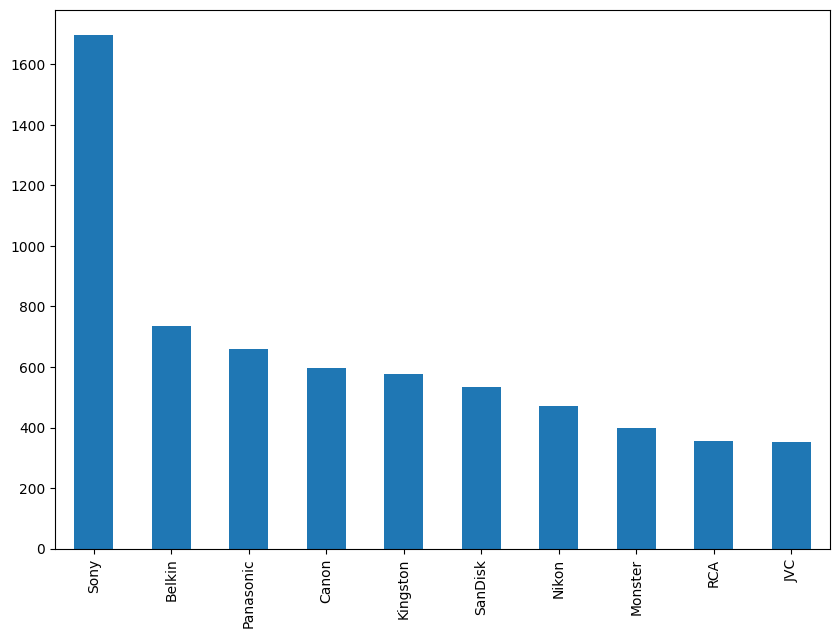

In [6]:
# Top most frequent brands
plt.subplots(figsize=(10,7))
products.brand.value_counts()[:10].plot(kind="bar")
plt.show()

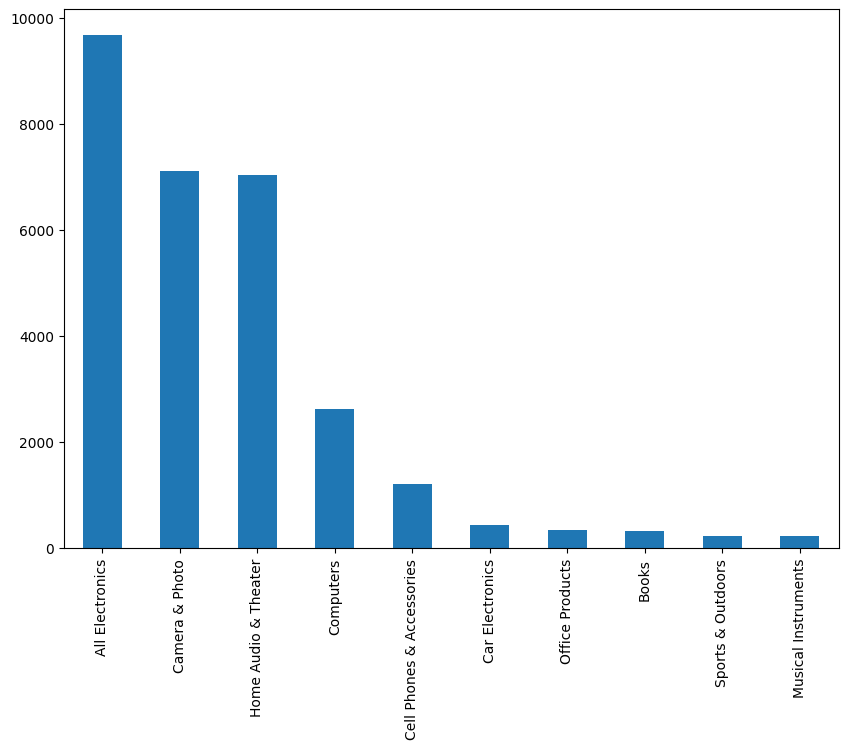

In [7]:
# Top 10 most frequent main categories
plt.subplots(figsize=(10,7))
products.main_cat.value_counts()[:10].plot(kind="bar")
plt.show()
# print(products.main_cat.value_counts()[:10])

# Content Based Filtering Recommender System

### Recommendation of products based on similar *brand* only:

In [ ]:
products_brand = products[['asin', 'title', 'brand', 'category', 'main_cat']]
products_brand.head()

In [ ]:
# Remove stop words
tf = TfidfVectorizer(analyzer='word', stop_words='english')
# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tf.fit_transform(products_brand['brand'])
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

In [ ]:
# Build 1-dimensional array with product titles
titles = products_brand[['title', 'brand', 'category', 'main_cat']]
indices = pd.Series(products_brand.index, index=products_brand['title'])

# print(indices["Microsoft Mouse (PS/2)"].iloc[0])
# print(list(enumerate(cosine_sim[indices["One Hot Summer"]])))

# Function that get product recommendations based on the cosine similarity score of brands
def brand_recommendations(title):
    # Get the index of the product that matches the title
    idx = indices[title]
    
    # Use the first product if there're multiple products with same title
    if (not isinstance(idx, (int, np.int64))):
        idx = indices[title].iloc[0]
    
    
    # Get the pairwsie similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 20 most similar products
    sim_scores = sim_scores[0:20]
    # Get the product indices
    product_indices = [i[0] for i in sim_scores]
    # Return the top 20 most similar products
    return titles.iloc[product_indices]

In [ ]:
# Getting the product title input from user
title_input = input('Enter product title: ')

In [ ]:
brand_recommendations(title_input)

In [ ]:
# print(list(dict.fromkeys(products['title'].tolist())))
print(sorted(list(dict.fromkeys(products['brand'].tolist()))))

In [ ]:
print(products.iloc[8]['title'])

### Recommendation of products based on similar *main category* only:

In [ ]:
products_main_cat = products[['asin', 'title', 'main_cat', 'category', 'brand']]
products_main_cat.head()

In [ ]:
# Remove stop words
tf_1 = TfidfVectorizer(analyzer='word', stop_words='english')
# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_1 = tf_1.fit_transform(products_main_cat['main_cat'])
# Compute the cosine similarity matrix
cosine_sim_1 = linear_kernel(tfidf_matrix_1, tfidf_matrix_1)

In [ ]:
cosine_sim_1

In [ ]:
# Build 1-dimensional array with product titles
titles_1 = products_main_cat[['title', 'main_cat', 'category', 'brand']]
indices_1 = pd.Series(products_main_cat.index, index=products_main_cat['title'])

# Function that get product recommendations based on the cosine similarity score of main_cat
def main_cat_recommendations(title):
    # Get the index of the product that matches the title
    idx = indices_1[title]
    
    # Use the first product if there're multiple products with same title
    if (not isinstance(idx, (int, np.int64))):
        idx = indices_1[title].iloc[0]
    
    # Get the pairwsie similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim_1[idx]))
    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 20 most similar products
    sim_scores = sim_scores[0:20]
    # Get the product indices
    product_indices = [i[0] for i in sim_scores]
    # Return the top 20 most similar products
    return titles_1.iloc[product_indices]

In [ ]:
# Getting the product title input from user
title_input = input('Enter product title: ')

In [ ]:
main_cat_recommendations(title_input)

In [ ]:
# list(dict.fromkeys(products.iloc[200:300]['title'].tolist()))

products[products['brand'].str.contains("Microsoft", case=False)]

### Recommendation of products based on similar *category tags* only:

In [ ]:
products_category = products[['asin', 'title', 'category', 'brand', 'main_cat']]
products_category.head()

In [ ]:
# Remove stop words
tf_2 = TfidfVectorizer(analyzer='word', stop_words='english')
# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_2 = tf_2.fit_transform(products_category['category'])
# Compute the cosine similarity matrix
cosine_sim_2 = linear_kernel(tfidf_matrix_2, tfidf_matrix_2)

### Recommendation of products based on categories tags, brand and main category:

In [8]:
# Creating datasoup made of selected columns
products['ensemble'] = products['title'] + ' ' + products['category'] + ' ' + products['brand'] + ' ' + products['main_cat']

# Printing record at index 0
print(products['ensemble'].iloc[0])

Genuine Geovision 1 Channel 3rd Party NVR IP Software with USB Dongle Onvif PSIA Electronics Camera & Photo Video Surveillance Surveillance Systems Surveillance DVR Kits GeoVision Camera & Photo


In [9]:
tf_coll = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix_coll = tf_coll.fit_transform(products['ensemble'])
cosine_sim_coll = linear_kernel(tfidf_matrix_coll, tfidf_matrix_coll)

In [13]:
# Build a 1-dimensional array with product titles
titles_3 = products[['title', 'category', 'brand', 'main_cat']]
indices_3 = pd.Series(products.index, index=products['title'])

# Function that get product recommendations based on the cosine similarity score of ensemble
def ensemble_recommendations(title):
    # Get the index of the product that matches the title
    idx = indices_3[title]
    
    # Use the first product if there're multiple products with same title
    if (not isinstance(idx, (int, np.int64))):
        idx = indices_3[title].iloc[0]
    
    # Get the pairwsie similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim_coll[idx]))
    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 20 most similar products
    sim_scores = sim_scores[0:20]
    # Get the product indices
    product_indices = [i[0] for i in sim_scores]
    # Return the top 20 most similar products
    print(type(titles_3.iloc[product_indices]))
    return titles_3.iloc[product_indices]

In [11]:
# Getting the product name from user
# Example input: Sony CFD-C1000 Compact Stereo System
title_input = input('Enter product name: ')

Enter product name: Acer TMC102T Tablet PC


In [14]:
ensemble_recommendations(title_input)

<class 'pandas.core.frame.DataFrame'>


,title,category,brand,main_cat
14775,Acer TMC102T Tablet PC,Electronics Computers & Accessories Computers ...,Acer,Computers
14791,Acer TMC102Ti Tablet PC,Electronics Computers & Accessories Computers ...,Acer,Computers
15690,"Acer TM C104TCi Tablet PC (900-MHz PIII-M, 25...",Electronics Computers & Accessories Computers ...,Acer,Computers
25592,Acer TravelMate C301 Tablet PC (1.50 GHz Penti...,Electronics Computers & Accessories Computers ...,Acer,Computers
26105,Acer TravelMate C110 Tablet PC (1.0 GHz Pentiu...,Electronics Computers & Accessories Computers ...,Acer,Computers
25673,Acer TravelMate C300 Tablet PC (1.5 GHz Centri...,Electronics Computers & Accessories Computers ...,Acer,Computers
28006,Acer Ferrari 3200 Laptop Computer PC,Electronics Computers & Accessories Computers ...,Acer,Computers
15757,Penabled Tablet Pc Clip Pen,Electronics Computers & Accessories Computers ...,Wacom,All Electronics
4645,"Acer 99SL 19"" CRT Monitor",Electronics Computers & Accessories Monitors,Acer,Computers
25235,"Acer TravelMate 290 Laptop (1.4 GHz Pentium M,...",Electronics Computers & Accessories Computers ...,Acer,Computers


## Using CountVectorizer to recommend products based on brand

In [ ]:
products_brand_cv = products[['asin', 'title', 'brand', 'category', 'main_cat']]
products_brand_cv.head()

In [ ]:
# Getting the product name from user
# Example input: Sony CFD-C1000 Compact Stereo System
title_input = input('Enter product name: ')

In [ ]:
# Initialize vectorizer
# min_df = rare words, max_df = most used words
vect1 = CountVectorizer(analyzer = 'word', ngram_range = (1,2), stop_words = 'english', min_df = 0.002)

# Fit into the brands
vect1.fit(products_brand_cv['brand'])
title_matrix = vect1.transform(products_brand_cv['brand'])

In [ ]:
features = vect1.get_feature_names_out()
features

In [ ]:
cosine_sim_titles = cosine_similarity(title_matrix, title_matrix)
cosine_sim_titles

In [ ]:
indices1 = pd.Series(products_brand_cv.index,index=products_brand_cv['title'])
title_id = indices1[title_input]

In [ ]:
# Find out what features have been considered  by the vectorizer for a given title 
feature_array = np.squeeze(title_matrix[title_id].toarray()) #squeeze activity matrix into array
idx = np.where(feature_array > 0)

In [ ]:
# Cosine similarity with other similar titles
n = 21 # how many books to be recommended
top_n_idx = np.flip(np.argsort(cosine_sim_titles[title_id,]), axis = 0)[0:n]
top_n_sim_values = cosine_sim_titles[title_id, top_n_idx]

In [ ]:
# find top n with values > 0
top_n_idx = top_n_idx[top_n_sim_values > 0]
scores = top_n_sim_values[top_n_sim_values > 0]

In [ ]:
products_brand_cv['title'].iloc[title_id]
pd.DataFrame({"products": products_brand_cv['title'].iloc[top_n_idx].values,
           "scores":scores}, columns = ["products","scores"])

## Using CountVectorizer to recommend products based on categories tags, brand and main category

In [ ]:
# Getting the product name from user
# Input Sony CFD-C1000 Compact Stereo System
title_input = input('Enter the product name: ')

In [ ]:
# Initialize vectorizer
# min_df = rare words, max_df = most used words
vect2 = CountVectorizer(analyzer = 'word', ngram_range = (1,2), stop_words = 'english', min_df = 0.002)

#Fit into the collection
vect2.fit(products['ensemble'])
title_matrix1 = vect2.transform(products['ensemble'])

In [ ]:
features1 = vect2.get_feature_names_out()
features1

In [ ]:
cosine_sim_titles1 = cosine_similarity(title_matrix1, title_matrix1)

In [ ]:
indices2 = pd.Series(products.index,index=products['title'])
title_id1 = indices2[title_input]

In [ ]:
feature_array = np.squeeze(title_matrix1[title_id1].toarray()) #squeeze activity matrix into array
idx = np.where(feature_array > 0)

In [ ]:
n = 21 # how many products to be recommended
top_n_idx1 = np.flip(np.argsort(cosine_sim_titles1[title_id1,]), axis = 0)[0:n]
top_n_sim_values1 = cosine_sim_titles1[title_id1, top_n_idx1]

In [ ]:
# find top n with values > 0
top_n_idx1 = top_n_idx1[top_n_sim_values1 > 0]
scores1 = top_n_sim_values1[top_n_sim_values1 > 0]

In [ ]:
products['title'].iloc[title_id1]
pd.DataFrame({"products": products['title'].iloc[top_n_idx1].values,
           "scores":scores1}, columns = ["products","scores"])